## Approach used:


    The following notebook contains the whole process of creating and comparing neural networks to classify the tweets into "JOY", "FEAR" , "ANGER" , "SADNESS", "DISGUST" ,"SHAME" ,"GUILT" emotion. We will be starting off with the data visualization, then we will be using word2vec model to convert our text into meaningfull numbers, then we will trained our LSTM neural net model and save it.    
    
    Here are the steps that we will be following to achieve the work that needs to be done:
    
   #### 1. Dataset loading:
    1) We started off with reading the data that we have in our iesar.csv. We will be using IsearLoader to load our data into the dataframe 
    
    
   #### 2. Data visualization:
    2) We then did some data visualization that includes showing the data distribution, tweets information, wordclouds and histogram.
    
   #### 3. Building Word2vec model:
    3) Data preprocessing plays an important role in NLP models. Since there are some chracters/words that can hinders the model performance.So our data processing includes removing speical characters, lemmatizing the words, replacing emojis with text.
    
   #### 4. Training the neural network :
    4) We then convert the text into numerical data using tf-idf vectorizer and trained our machine learning models on the vectorized data. 
        4a.For the evaluation of the classifier built we used the metric accuracy that was tested on differnt folds using k-fold cross validation. And then we plot the  confusion matrix and an accuracy plot.
  
  #### 5. Saving the model:
    5 We will then fine tune our one of the model and saved it in the disk using pickle so in future we can make predictions using the saved models.
  

## 1. Dataset loading:

In [19]:
import os
import pandas as pd
from py_isear.isear_loader import IsearLoader
import itertools
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import SGDClassifier

In [4]:

data = ['TEMPER', 'TROPHO']
target = ['EMOT']
loader = IsearLoader(data,target)
dataset = loader.load_isear('./trainingdata/isear.csv')

text_data_set = dataset.get_freetext_content()
target_set = dataset.get_target()
target_chain = itertools.chain(*target_set)
target_data = list(target_chain)

## 2. Data visualization:

EMOT : subject's main emotion

1 JOY

2 FEAR

3 ANGER 

4 SADNESS

5 DISGUST

6 SHAME

7 GUILT



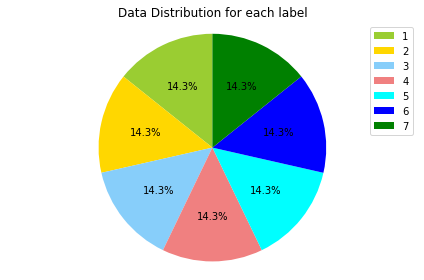

In [18]:
### Pie chart showing the class distribution in data
import numpy as np
import matplotlib.pyplot as plt
# The slices will be ordered and plotted counter-clockwise.
labels = list(np.unique(target_set))
sizes = list(np.bincount(np.ravel(target_set))[1:])
colors = ['yellowgreen', 'gold', 'lightskyblue', 'lightcoral','cyan','blue','green']
patches, texts,per = plt.pie(sizes, colors=colors, startangle=90,autopct='%0.1f%%')
plt.legend(patches, labels, loc="best")
# Set aspect ratio to be equal so that pie is drawn as a circle.
plt.axis('equal')
plt.title('Data Distribution for each label')
plt.tight_layout()
plt.show()

In [25]:
df= pd.DataFrame(text_data_set,columns=["text"])
df['emotion']=target_data

joydf=df[df['emotion']==1]
feardf=df[df['emotion']==2]
angdf=df[df['emotion']==3]
saddf=df[df['emotion']==4]
disdf=df[df['emotion']==5]
shamedf=df[df['emotion']==6]
guiltdf=df[df['emotion']==7]

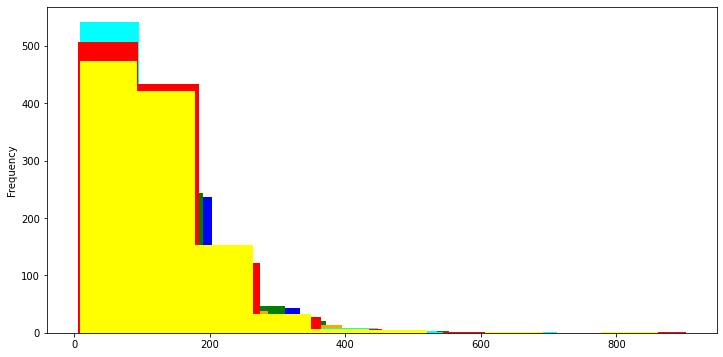

In [27]:
## Histogram showing the length of tweets of all categories
joydf['text'].str.len().plot.hist(color = 'pink', figsize = (12, 6))
feardf['text'].str.len().plot.hist(color = 'blue', figsize = (12, 6))
angdf['text'].str.len().plot.hist(color = 'green', figsize = (12, 6))
saddf['text'].str.len().plot.hist(color = 'orange', figsize = (12, 6))
disdf['text'].str.len().plot.hist(color = 'cyan', figsize = (12, 6))
shamedf['text'].str.len().plot.hist(color = 'red', figsize = (12, 6))
guiltdf['text'].str.len().plot.hist(color = 'yellow', figsize = (12, 6))

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english')
from wordcloud import WordCloud


Text(0.5, 1.0, 'WordCloud - Most Frequently Occuring Words in joy tweets')

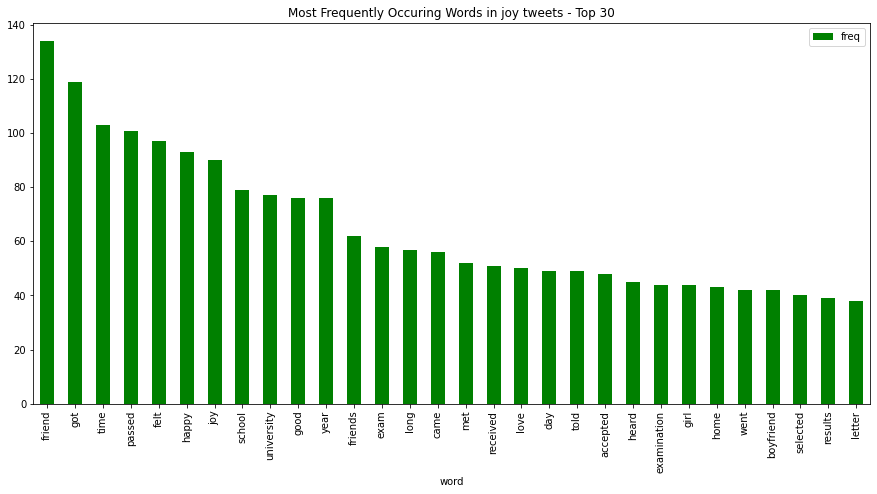

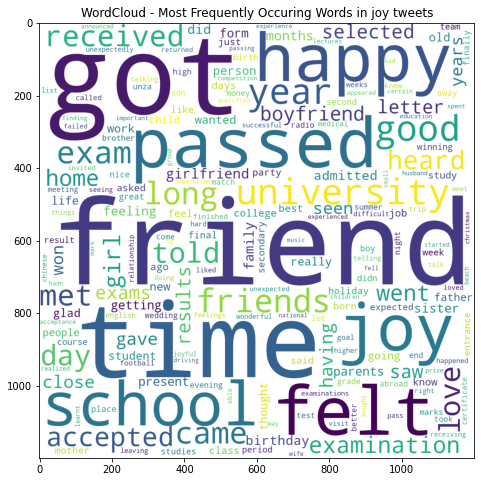

In [38]:

words = cv.fit_transform(joydf.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'green')
plt.title("Most Frequently Occuring Words in joy tweets - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Most Frequently Occuring Words in joy tweets", fontsize = 12)

Text(0.5, 1.0, 'WordCloud - Most Frequently Occuring Words in fear tweets')

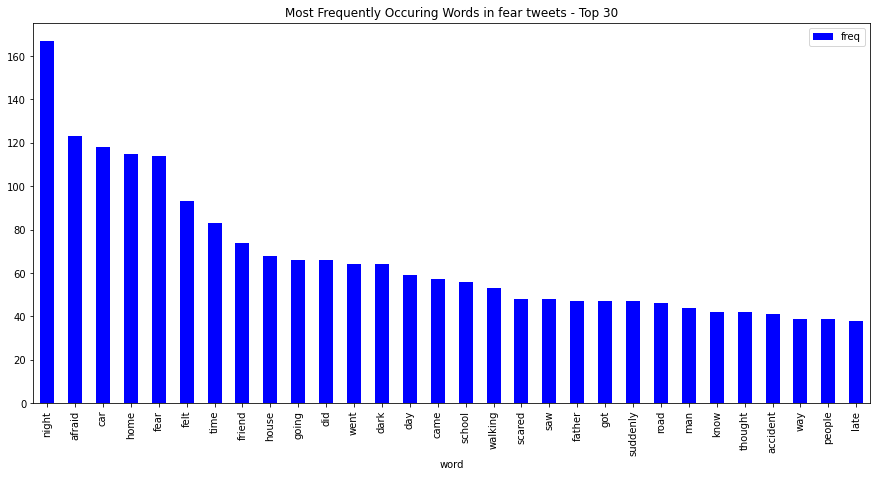

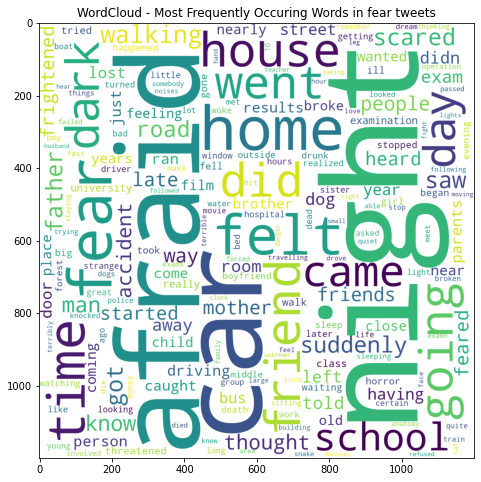

In [30]:

words = cv.fit_transform(feardf.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words in fear tweets - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Most Frequently Occuring Words in fear tweets", fontsize = 12)

Text(0.5, 1.0, 'WordCloud - Most Frequently Occuring Words in angry tweets')

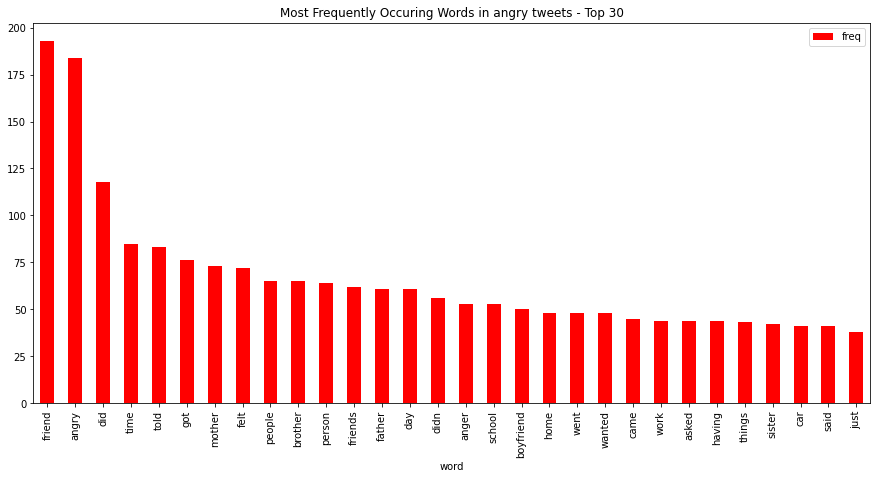

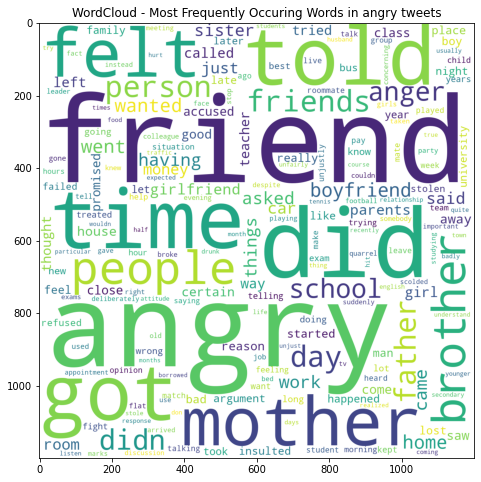

In [32]:

words = cv.fit_transform(angdf.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'red')
plt.title("Most Frequently Occuring Words in angry tweets - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Most Frequently Occuring Words in angry tweets", fontsize = 12)

Text(0.5, 1.0, 'WordCloud - Most Frequently Occuring Words in sad tweets')

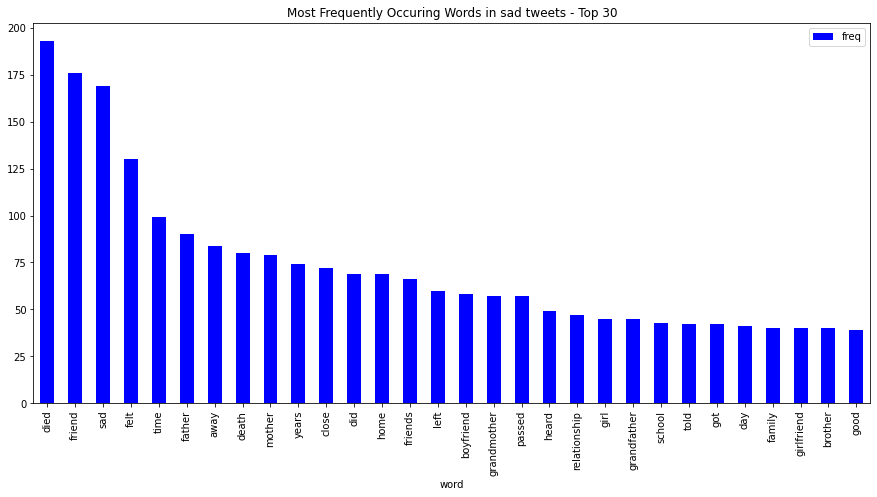

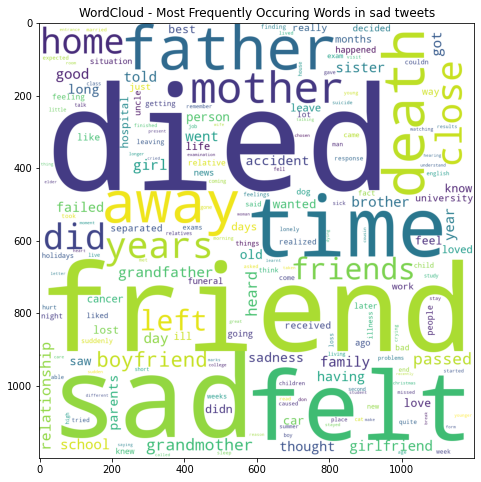

In [33]:

words = cv.fit_transform(saddf.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words in sad tweets - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Most Frequently Occuring Words in sad tweets", fontsize = 12)

Text(0.5, 1.0, 'WordCloud - Most Frequently Occuring Words in disgust tweets')

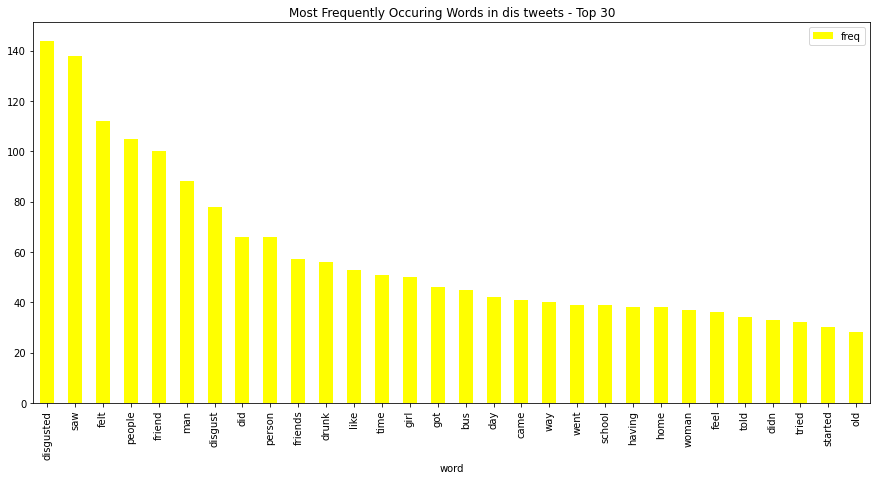

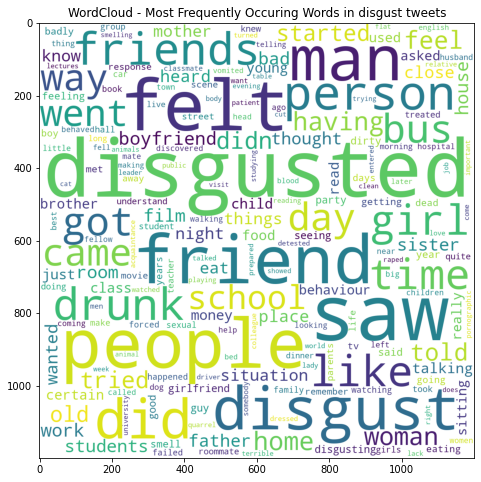

In [37]:

words = cv.fit_transform(disdf.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'yellow')
plt.title("Most Frequently Occuring Words in dis tweets - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Most Frequently Occuring Words in disgust tweets", fontsize = 12)

Text(0.5, 1.0, 'WordCloud - Most Frequently Occuring Words in shame tweets')

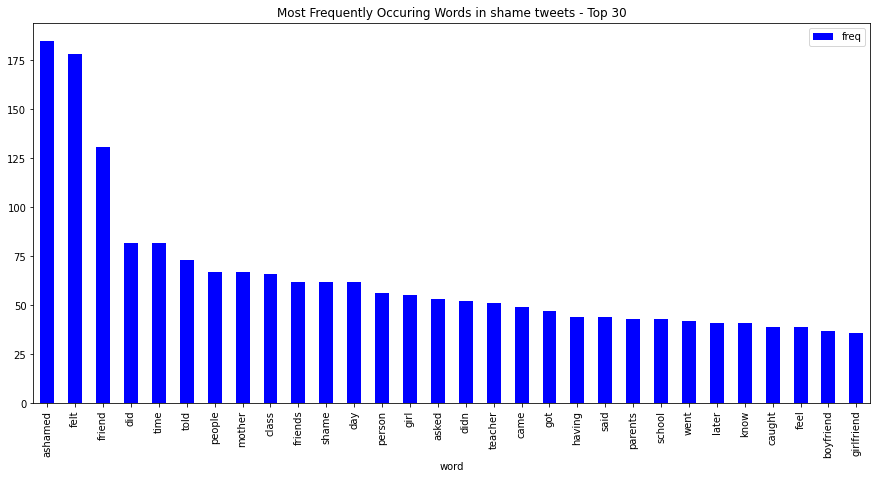

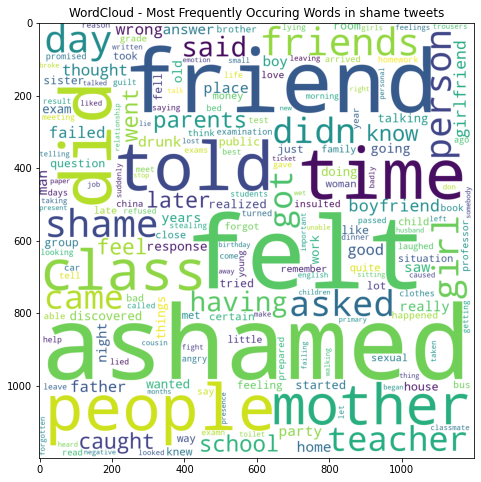

In [35]:

words = cv.fit_transform(shamedf.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words in shame tweets - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Most Frequently Occuring Words in shame tweets", fontsize = 12)

Text(0.5, 1.0, 'WordCloud - Most Frequently Occuring Words in guilt tweets')

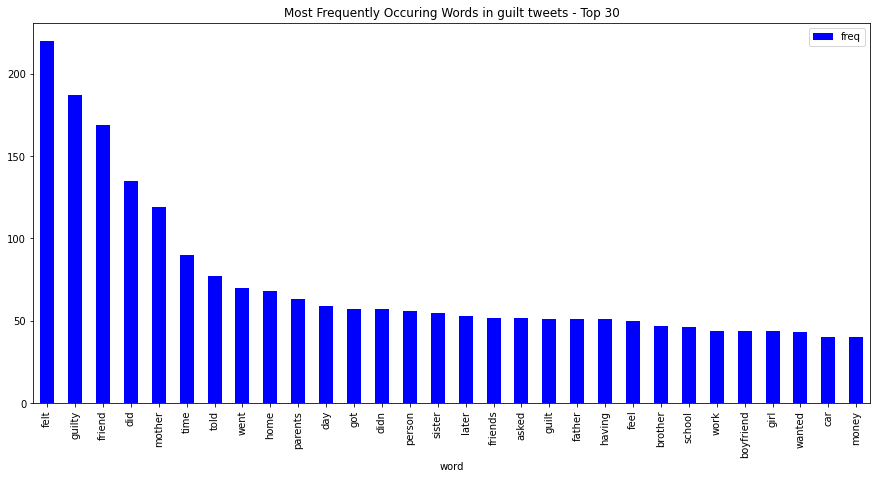

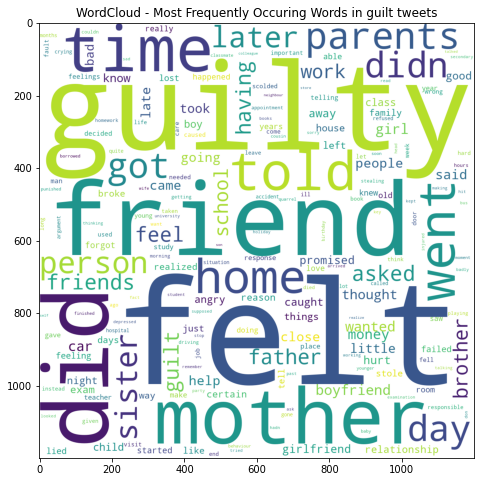

In [36]:

words = cv.fit_transform(guiltdf.text)
sum_words = words.sum(axis=0)

words_freq = [(word, sum_words[0, i]) for word, i in cv.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])

frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color = 'blue')
plt.title("Most Frequently Occuring Words in guilt tweets - Top 30")


wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.title("WordCloud - Most Frequently Occuring Words in guilt tweets", fontsize = 12)

## 3. Building Word2vec model:

In [5]:
import gensim
import re
import numpy as np
from nltk import ngrams

In [7]:
## Seperating features and labels
from keras.utils import np_utils

X= np.array(text_data_set)
y= np.ravel(target_set)
from sklearn.preprocessing import OneHotEncoder
Y=np_utils.to_categorical(y, num_classes=8)


In [8]:
## loading word2vec model

from gensim.models.word2vec import Word2Vec
from gensim.models import KeyedVectors
t_model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300.bin', binary=True)


In [9]:
def get_vec(n_model,dim, token):
    """Function will return the vecotrs of the words given that are stored in Word2vec model"""
    vec = np.zeros(dim)
    is_vec = False
    if token not in n_model.wv:
        _count = 0
        is_vec = True
        for w in token.split("_"):
            if w in n_model.wv:
                _count += 1
                vec += n_model.wv[w]
        if _count > 0:
            vec = vec / _count
    else:
        vec = n_model.wv[token]
    return vec

In [10]:
max_length = 300 

In [120]:
from tensorflow.python.keras.preprocessing.text import Tokenizer
from tensorflow.python.keras.preprocessing.sequence import pad_sequences

VALIDATION_SPLIT = 0.001 ### We are keeping the validation set so small so that we have more data for training.
tweet_lines=X
# A Tokenizer is first fit on a list of strings and then converts this list into a list of lists of integers. 

# vectorize the text samples into a 2D integer tensor
tokenizer_obj = Tokenizer()
tokenizer_obj.fit_on_texts(tweet_lines)
sequences = tokenizer_obj.texts_to_sequences(tweet_lines)


# pad sequences
word_index = tokenizer_obj.word_index
print('Found %s unique tokens.' % len(word_index))

tweet_pad = pad_sequences(sequences, maxlen=max_length)

sentiment =  Y
print('Shape of tweet tensor:', tweet_pad.shape)
print('Shape of sentiment tensor:', sentiment.shape)

# split the data into a training set and a validation set
indices = np.arange(tweet_pad.shape[0])
np.random.shuffle(indices)
tweet_pad = tweet_pad[indices]
sentiment = sentiment[indices]
num_validation_samples = int(VALIDATION_SPLIT * tweet_pad.shape[0])

X_train_pad = tweet_pad[:-num_validation_samples]
y_train = sentiment[:-num_validation_samples]
X_test_pad = tweet_pad[-num_validation_samples:]
y_test = sentiment[-num_validation_samples:]

import pickle

# saving tokenizer
with open('tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer_obj, handle, protocol=pickle.HIGHEST_PROTOCOL)


Found 9063 unique tokens.
Shape of review tensor: (7666, 300)
Shape of sentiment tensor: (7666, 8)


In [12]:
print('Shape of X_train_pad tensor:', X_train_pad.shape)
print('Shape of y_train tensor:', y_train.shape)

print('Shape of X_test_pad tensor:', X_test_pad.shape)
print('Shape of y_test tensor:', y_test.shape)

Shape of X_train_pad tensor: (7659, 300)
Shape of y_train tensor: (7659, 8)
Shape of X_test_pad tensor: (7, 300)
Shape of y_test tensor: (7, 8)


In [1]:
EMBEDDING_DIM =300
num_words = len(word_index) + 1
embedding_matrix = np.zeros((num_words, EMBEDDING_DIM))

for word, i in word_index.items():
    if i > num_words:
        continue
        
    embedding_vector = get_vec(t_model,300,word)
    if embedding_vector is not None:
        # words not found in embedding index will be all-zeros.
        embedding_matrix[i] = embedding_vector

## 4. Training and evaluating the neural network :

In [14]:

from keras.models import Sequential
from keras.layers import Dense
import numpy

import warnings
warnings.filterwarnings("ignore")

from keras.models import Sequential
from keras.layers import Dense, Embedding, Dropout, Flatten, LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.initializers import Constant



cvscores = []
# define model
def def_model(num_words):
    model = Sequential()
    # load pre-trained word embeddings into an Embedding layer
    # note that we set trainable = False so as to keep the embeddings fixed
    embedding_layer = Embedding(num_words,
                              EMBEDDING_DIM,
                              embeddings_initializer=Constant(embedding_matrix),
                              input_length=max_length,
                              trainable=False
                              )

    model.add(embedding_layer)
    # learn the correlations
    # Recurrent layer
    model.add(LSTM(units=32,  dropout=0.2, recurrent_dropout=0.2))

    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(8, activation='sigmoid'))
    return model



In [15]:
from keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor='loss', factor=0.1, patience=10,
                              verbose=0, mode='auto', min_delta=0.0001,
                              cooldown=0, min_lr=0)

In [16]:
model=def_model(num_words)
# compile network
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the model، We set twenty percent of our data aside for validation.
H=model.fit(X_train_pad,y_train, epochs=55, batch_size=128 , verbose=1,callbacks=[reduce_lr])




Epoch 1/55
7659/7659 [==============================] - 18s 2ms/step - loss: 2.0121 - accuracy: 0.1478
Epoch 2/55
7659/7659 [==============================] - 18s 2ms/step - loss: 1.9345 - accuracy: 0.1847
Epoch 3/55
7659/7659 [==============================] - 19s 2ms/step - loss: 1.8467 - accuracy: 0.2660
Epoch 4/55
7659/7659 [==============================] - 19s 2ms/step - loss: 1.7284 - accuracy: 0.3258
Epoch 5/55
7659/7659 [==============================] - 19s 2ms/step - loss: 1.6672 - accuracy: 0.3512
Epoch 6/55
7659/7659 [==============================] - 19s 2ms/step - loss: 1.5883 - accuracy: 0.3852
Epoch 7/55
7659/7659 [==============================] - 19s 2ms/step - loss: 1.5336 - accuracy: 0.4185
Epoch 8/55
7659/7659 [==============================] - 19s 2ms/step - loss: 1.4817 - accuracy: 0.4454
Epoch 9/55
7659/7659 [==============================] - 19s 2ms/step - loss: 1.4283 - accuracy: 0.4630
Epoch 10/55
7659/7659 [==============================] - 19s 2ms/step - l

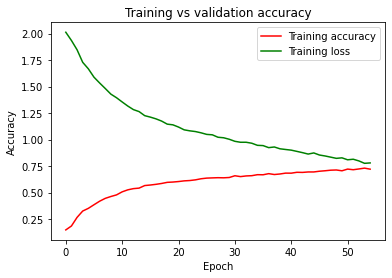

In [69]:
import matplotlib.pyplot as plt
plt.plot(H.history['accuracy'],'r',label="Training accuracy")
plt.plot(H.history['loss'],'g',label="Training loss")
plt.title("Training vs validation accuracy")
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()

In [77]:
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test,axis=1),model.predict_classes(X_test_pad)))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         1
           3       0.00      0.00      0.00         0
           4       1.00      1.00      1.00         2
           7       1.00      0.67      0.80         3

    accuracy                           0.86         7
   macro avg       0.80      0.73      0.76         7
weighted avg       1.00      0.86      0.91         7



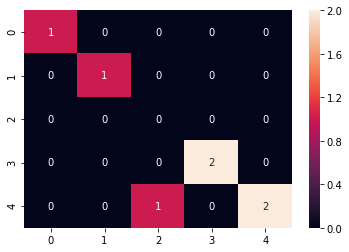

In [78]:
import seaborn as sns
from sklearn.metrics import f1_score,confusion_matrix
cm = confusion_matrix(np.argmax(y_test,axis=1),model.predict_classes(X_test_pad))
sns.heatmap(cm,annot=True,fmt="d")

## 5. Saving the model:

In [72]:
from keras.models import load_model

model.save('my_model.h5')  # creates a HDF5 file 'my_model.h5'